### Student Information
Name: Gregorius Ethanael Irawan

Student ID: T14705301

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 1. The Data

In [1]:
# test code for environment setup and import necessary libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap



[nltk_data] Downloading package punkt to /Users/ethanael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
# Importing the Data
df = pd.read_csv("/Users/ethanael/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv")

df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


## 2. Data Preparation

In [72]:
# In this part, I will keep 5 columns for further analysis. 
# datetime and post_id as the key column
# Text and Sentiment column for the sentiment classification and subreddit for categorical visualization purposes.

df = df[["datetime","post_id","subreddit", "text", "sentiment"]]

#### I don't use the twenty_train format as the data is already in pandas dataframe format.

### **>>> Exercise 1**
In this exercise, please print out the *text* data for the first three samples in the dataset.

In [73]:
df['text'].iloc[:3] # printing out 'text' for the first three.

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
Name: text, dtype: object

## 3. Data Transformation

#### I skipped part 3.1 because the data is already in Pandas Dataframe format

### 3.2 Familiarizing yourself with the Data

In [74]:
# a simple query
df[:10][["text","subreddit"]] #query of the first 10 records of columns text and subreddit

,text,subreddit
0,Calls on retards,wallstreetbets
1,Stunt as in like why did they even make a big ...,wallstreetbets
2,Seeing lots of red in the ticker.,StockMarket
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday
4,He didn’t say thank you.,StockMarket
5,"Hoping to ejaculate in wet warm puss tonight, ...",wallstreetbets
6,Trump will respond to china increasing their t...,stocks
7,Confirmed not a trap. Its been like this for p...,wallstreetbets
8,Am I the only one seeing the cup & handle brea...,stocks
9,HLGN is $10. Hurry and catch it now before it ...,stockstobuytoday


In [75]:
# querying the last 10 records
df[-10:]

,datetime,post_id,subreddit,text,sentiment
837,2021-02-01 17:13:52,glmdsae,stocks,Finance media lying \n\n*Surprise*,0.0
838,2021-04-26 20:17:28,gvyyjqb,stockstobuytoday,I am all in,0.0
839,2025-04-11 16:02:56,mml0hpk,StockMarket,The Art of the Deal…,0.0
840,2025-04-11 9:32:08,mmjac41,StockMarket,Lol fr,1.0
841,2025-04-11 16:09:15,mml1qqd,StockMarket,So countries “begging to stop the tariffs” and...,0.0
842,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,Invest now it is going to shoot up tomorrow,0.0
843,2025-04-11 5:01:24,mmijiuz,StockMarket,Where can I read this?,0.0
844,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0
845,2025-04-11 20:13:26,mmmely7,wallstreetbets,i sold my puts so i expect cheeto to declare w...,0.0
846,2025-04-12 3:09:06,mmobyz1,wallstreetbets,![img](emote|t5_2th52|31224),0.0


In [76]:
# using loc (by label)
df.loc[:10,'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [78]:
# using iloc (by position)
df.iloc[:10,3]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

### **>>> Exercise 2:** 
Experiment with other querying techniques using pandas dataframes.

In [79]:
df.loc[:5,'subreddit'] # querying the first 5 data of a specified column

0      wallstreetbets
1      wallstreetbets
2         StockMarket
3    stockstobuytoday
4         StockMarket
5      wallstreetbets
Name: subreddit, dtype: object

In [80]:
df.iloc[:5,4] # querying the first 5 data of the 4th column

0   -1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: sentiment, dtype: float64

In [81]:
df.loc[:10, ["text", "subreddit"]] # querying the first 10 data of text and subreddit column

,text,subreddit
0,Calls on retards,wallstreetbets
1,Stunt as in like why did they even make a big ...,wallstreetbets
2,Seeing lots of red in the ticker.,StockMarket
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday
4,He didn’t say thank you.,StockMarket
5,"Hoping to ejaculate in wet warm puss tonight, ...",wallstreetbets
6,Trump will respond to china increasing their t...,stocks
7,Confirmed not a trap. Its been like this for p...,wallstreetbets
8,Am I the only one seeing the cup & handle brea...,stocks
9,HLGN is $10. Hurry and catch it now before it ...,stockstobuytoday


In [82]:
df[df["subreddit"] == "stocks"] # querying with conditional where subreddit = stocks

,datetime,post_id,subreddit,text,sentiment
6,2025-04-11 12:37:23,mmjx7vz,stocks,Trump will respond to china increasing their t...,-1.0
8,2021-02-01 15:36:32,gllyi5z,stocks,Am I the only one seeing the cup & handle brea...,1.0
10,2025-04-11 15:19:19,mmkri9d,stocks,It's a copy/paste from a Bloomberg terminal.,0.0
12,2025-04-11 5:55:28,mmipka9,stocks,"Honestly let the economy burn, maybe people wi...",1.0
13,2025-03-04 23:49:37,mg20s26,stocks,"\nI’ve been doing pretty good with this, but i...",1.0
...,...,...,...,...,...
831,2025-04-11 15:00:14,mmknn5s,stocks,Things will get better soon. Once those 9 tran...,1.0
833,2025-04-10 19:53:17,mmg0rfb,stocks,LVMH (MC)-31.42%\n\nDisney (DIS)-17.03% \n\nAp...,0.0
834,2025-04-11 11:05:48,mmjkdim,stocks,There's going to be 4 years of this shit. How ...,-1.0
835,2021-02-01 13:56:01,glljm0r,stocks,I was also disappointed to see it mentioned in...,-1.0


In [83]:
df.query("sentiment == 1") # querying with conditional where the sentiment is positive

,datetime,post_id,subreddit,text,sentiment
1,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Stunt as in like why did they even make a big ...,1.0
3,2023-08-30 17:12:55,165kllm,stockstobuytoday,Vision Marine Technologies Inc. is rewriting t...,1.0
5,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,"Hoping to ejaculate in wet warm puss tonight, ...",1.0
7,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Confirmed not a trap. Its been like this for p...,1.0
8,2021-02-01 15:36:32,gllyi5z,stocks,Am I the only one seeing the cup & handle brea...,1.0
...,...,...,...,...,...
827,2025-04-11 14:42:51,mmkk45p,StockMarket,"Exciting, I guess that’s one way to characteri...",1.0
831,2025-04-11 15:00:14,mmknn5s,stocks,Things will get better soon. Once those 9 tran...,1.0
832,2023-12-07 14:52:08,kcdd0nh,stockstobuytoday,NICE. Cannot complain.,1.0
836,2025-03-26 12:18:30,1jkadvn,stockstobuytoday,"how does the futures market look today\n\nSPY,...",1.0


In [84]:
df.filter(items=["sentiment"], axis=1) # select the column sentiment

,sentiment
0,-1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
842,0.0
843,0.0
844,0.0
845,0.0


### **>>> Exercise 3:**  
Try to fetch records belonging to the ```StockMarket``` category, and query every 10th record. Only show the first 5 records.

In [85]:
df[df["subreddit"] == "StockMarket"][::10][:5]

,datetime,post_id,subreddit,text,sentiment
2,2025-04-10 15:09:41,mmeevio,StockMarket,Seeing lots of red in the ticker.,0.0
62,2025-04-11 16:11:48,mml28yw,StockMarket,Comedy gold :)),1.0
94,2025-04-11 15:15:20,mmkqpao,StockMarket,I can’t take four years of lying. Help!,0.0
113,2025-04-11 10:04:54,mmjdl3n,StockMarket,\nAn evil man will burn his own nation to the ...,-1.0
146,2025-04-11 14:46:24,mmkku1z,StockMarket,He reached this level only because of his inhe...,1.0


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [86]:
# check missing values
df.isnull()

,datetime,post_id,subreddit,text,sentiment
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
842,False,False,False,False,False
843,False,False,False,False,False
844,False,False,False,False,False
845,False,False,False,False,False


In [87]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,datetime,post_id,subreddit,text,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


We can see that there are no missing values

### >>> **Exercise 4:** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  

In [88]:
df.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

I will skip the insert dummy missing value as the implementation is similar to the master.

### >>> **Exercise 5:** 

Exercise was done in the master.

### 4.2 Dealing with Duplicate Data

In [89]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [90]:
sum(df.duplicated())

0

No duplicates were found.

In [91]:
# In this part, I will keep 3 columns for further analysis. Text and Sentiment column for the sentiment classification and subreddit for categorical visualization purposes.
# datetime and post_id is no longer needed. I tried dropping them from the start and found out that duplicate datas will be detected. However, from the datetime and post_id, it can be seen that those datas are actually unique.

df = df[["subreddit", "text", "sentiment"]]

## 5. Data Preprocessing

### 5.1 Sampling

In [92]:
# As the number of data is 847, I will set a sample of 200.

df_sample = df.sample(n=200)

In [93]:
len(df_sample)

200

In [94]:
df_sample[0:4]

,subreddit,text,sentiment
635,stocks,"To be fair - Jerome Powell ""inflation is tran...",1.0
673,stocks,Agreed. I think the pause is basically going t...,-1.0
578,StockMarket,Anyone else would be indicted for insider trad...,0.0
204,StockMarket,China will fold and Trump will get the W he wa...,0.0


### >>> Exercise 6:
Notice any changes from the `df` dataframe to the `df_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `df`. Feel free to query and look more closely at the dataframe for these changes.

It will select 200 random samples from the 847 population. 

The first noticeable part is that the rows are not sequential. In df dataframe, we can see it starting from 0 and increases by 1. In df_sample, we start from 635 and has no rule for the next rows as it is randomized.

In [95]:
import matplotlib.pyplot as plt

In [96]:
# Checking unique value for subreddit

categories = df["subreddit"].unique()

categories



array(['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks'],
      dtype=object)

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

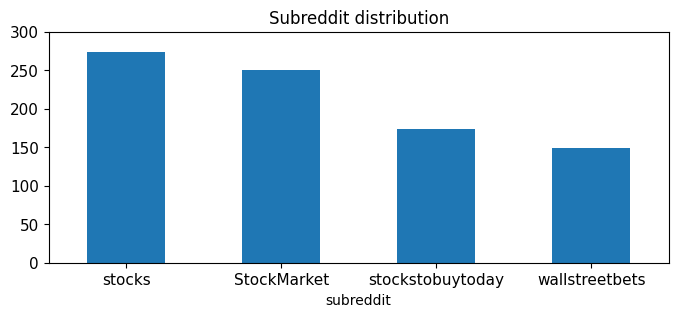

In [99]:
print(df.subreddit.value_counts())

# plot barchart for df
df.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

subreddit
stocks              63
StockMarket         57
stockstobuytoday    42
wallstreetbets      38
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribuion'}, xlabel='subreddit'>

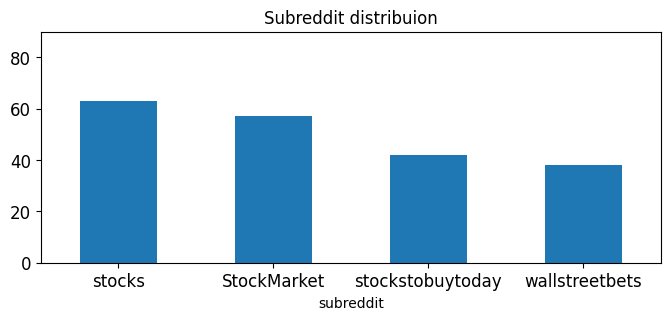

In [103]:
print(df_sample.subreddit.value_counts())

# plot barchart for df_sample
df_sample.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Subreddit distribuion',
                                           ylim = [0, 90], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7:**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

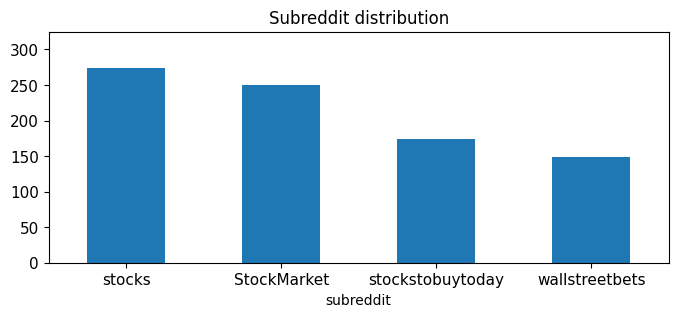

In [107]:
# plot barchart for df and hard-coding the limit
df.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit distribution',
                                    ylim = [0, df.subreddit.value_counts().max()+51],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

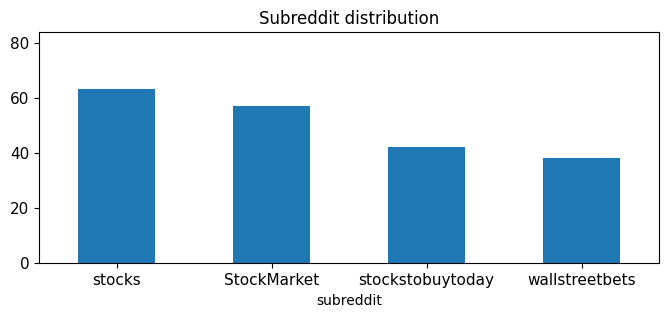

In [113]:
# plot barchart for df_sample and hard-coding the limit
df_sample.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit distribution',
                                    ylim = [0, df_sample.subreddit.value_counts().max()+21],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 8:** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

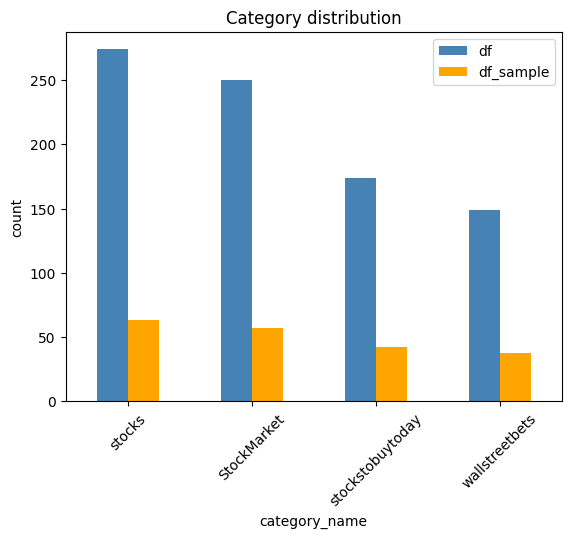

In [114]:
counts1 = df.subreddit.value_counts()        
counts2 = df_sample.subreddit.value_counts()

data = pd.DataFrame({'df': counts1, 'df_sample': counts2}).fillna(0)
data.plot(kind='bar', 
        title='Category distribution',
        color=['steelblue', 'orange'])
plt.ylabel('count')
plt.xlabel('category_name')
plt.xticks(rotation=45)
plt.show()


### 5.2 Feature Creation

In [115]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/ethanael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ethanael/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [116]:
# takes a like a minute or two to process

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [117]:
df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [118]:
df[0:4]

,subreddit,text,sentiment,unigrams
0,wallstreetbets,Calls on retards,-1.0,"[Calls, on, retards]"
1,wallstreetbets,Stunt as in like why did they even make a big ...,1.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,StockMarket,Seeing lots of red in the ticker.,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,stockstobuytoday,Vision Marine Technologies Inc. is rewriting t...,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [120]:
list(df[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [126]:
# examples
count_vect.get_feature_names_out()[343]

'answer'

In [127]:
count_vect.get_feature_names_out()[22]

'125'

In [128]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a taiwanese beef noodle")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'taiwanese', 'beef', 'noodle']

### **>>> Exercise 9:**
Let's analyze the first record of our df dataframe with the new analyzer we have just built.

In [129]:
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(df.text[0])

['calls', 'on', 'retards']

In [130]:
# Check matrix shape
df_counts.shape

(847, 4346)

In [131]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [136]:
# Convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10:**
Notice that there is a 3 in the fourth record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [138]:
count_vect.get_feature_names_out()[18]

'116'

In [139]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [141]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [142]:
plot_z = df_counts[0:20, 0:20].toarray() #df_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

Next, I will create a heatmap using seaborn

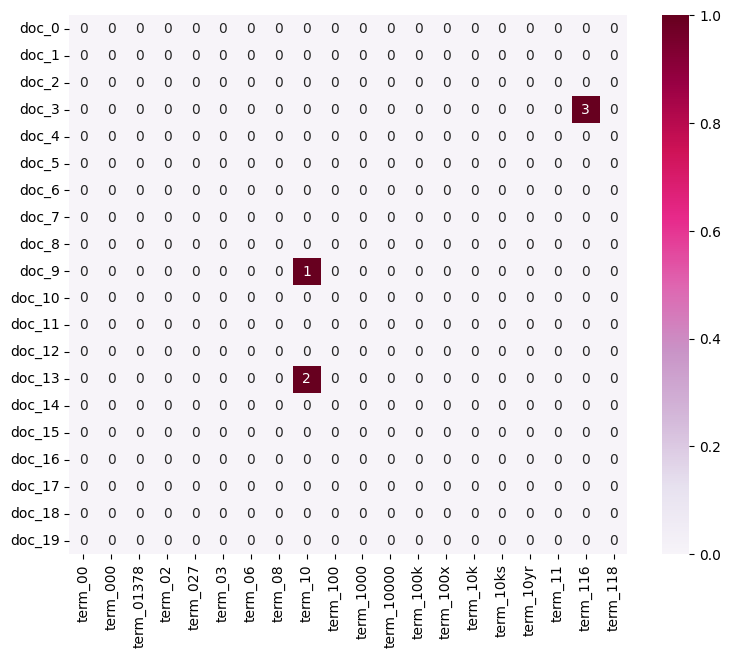

In [143]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11:** 
From the chart above, we can see how sparse the term-document matrix is. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [146]:
# Answer here

# Case 1: Select 20-100 features only (bigger than before)

plot_a = ["term_"+str(i) for i in count_vect.get_feature_names_out()[20:100]]

# obtain document index
plot_b = ["doc_"+ str(i) for i in list(df.index)[20:100]]

plot_c = df_counts[20:100, 20:100].toarray() #df_counts[how many documents, how many terms]
plot_c

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

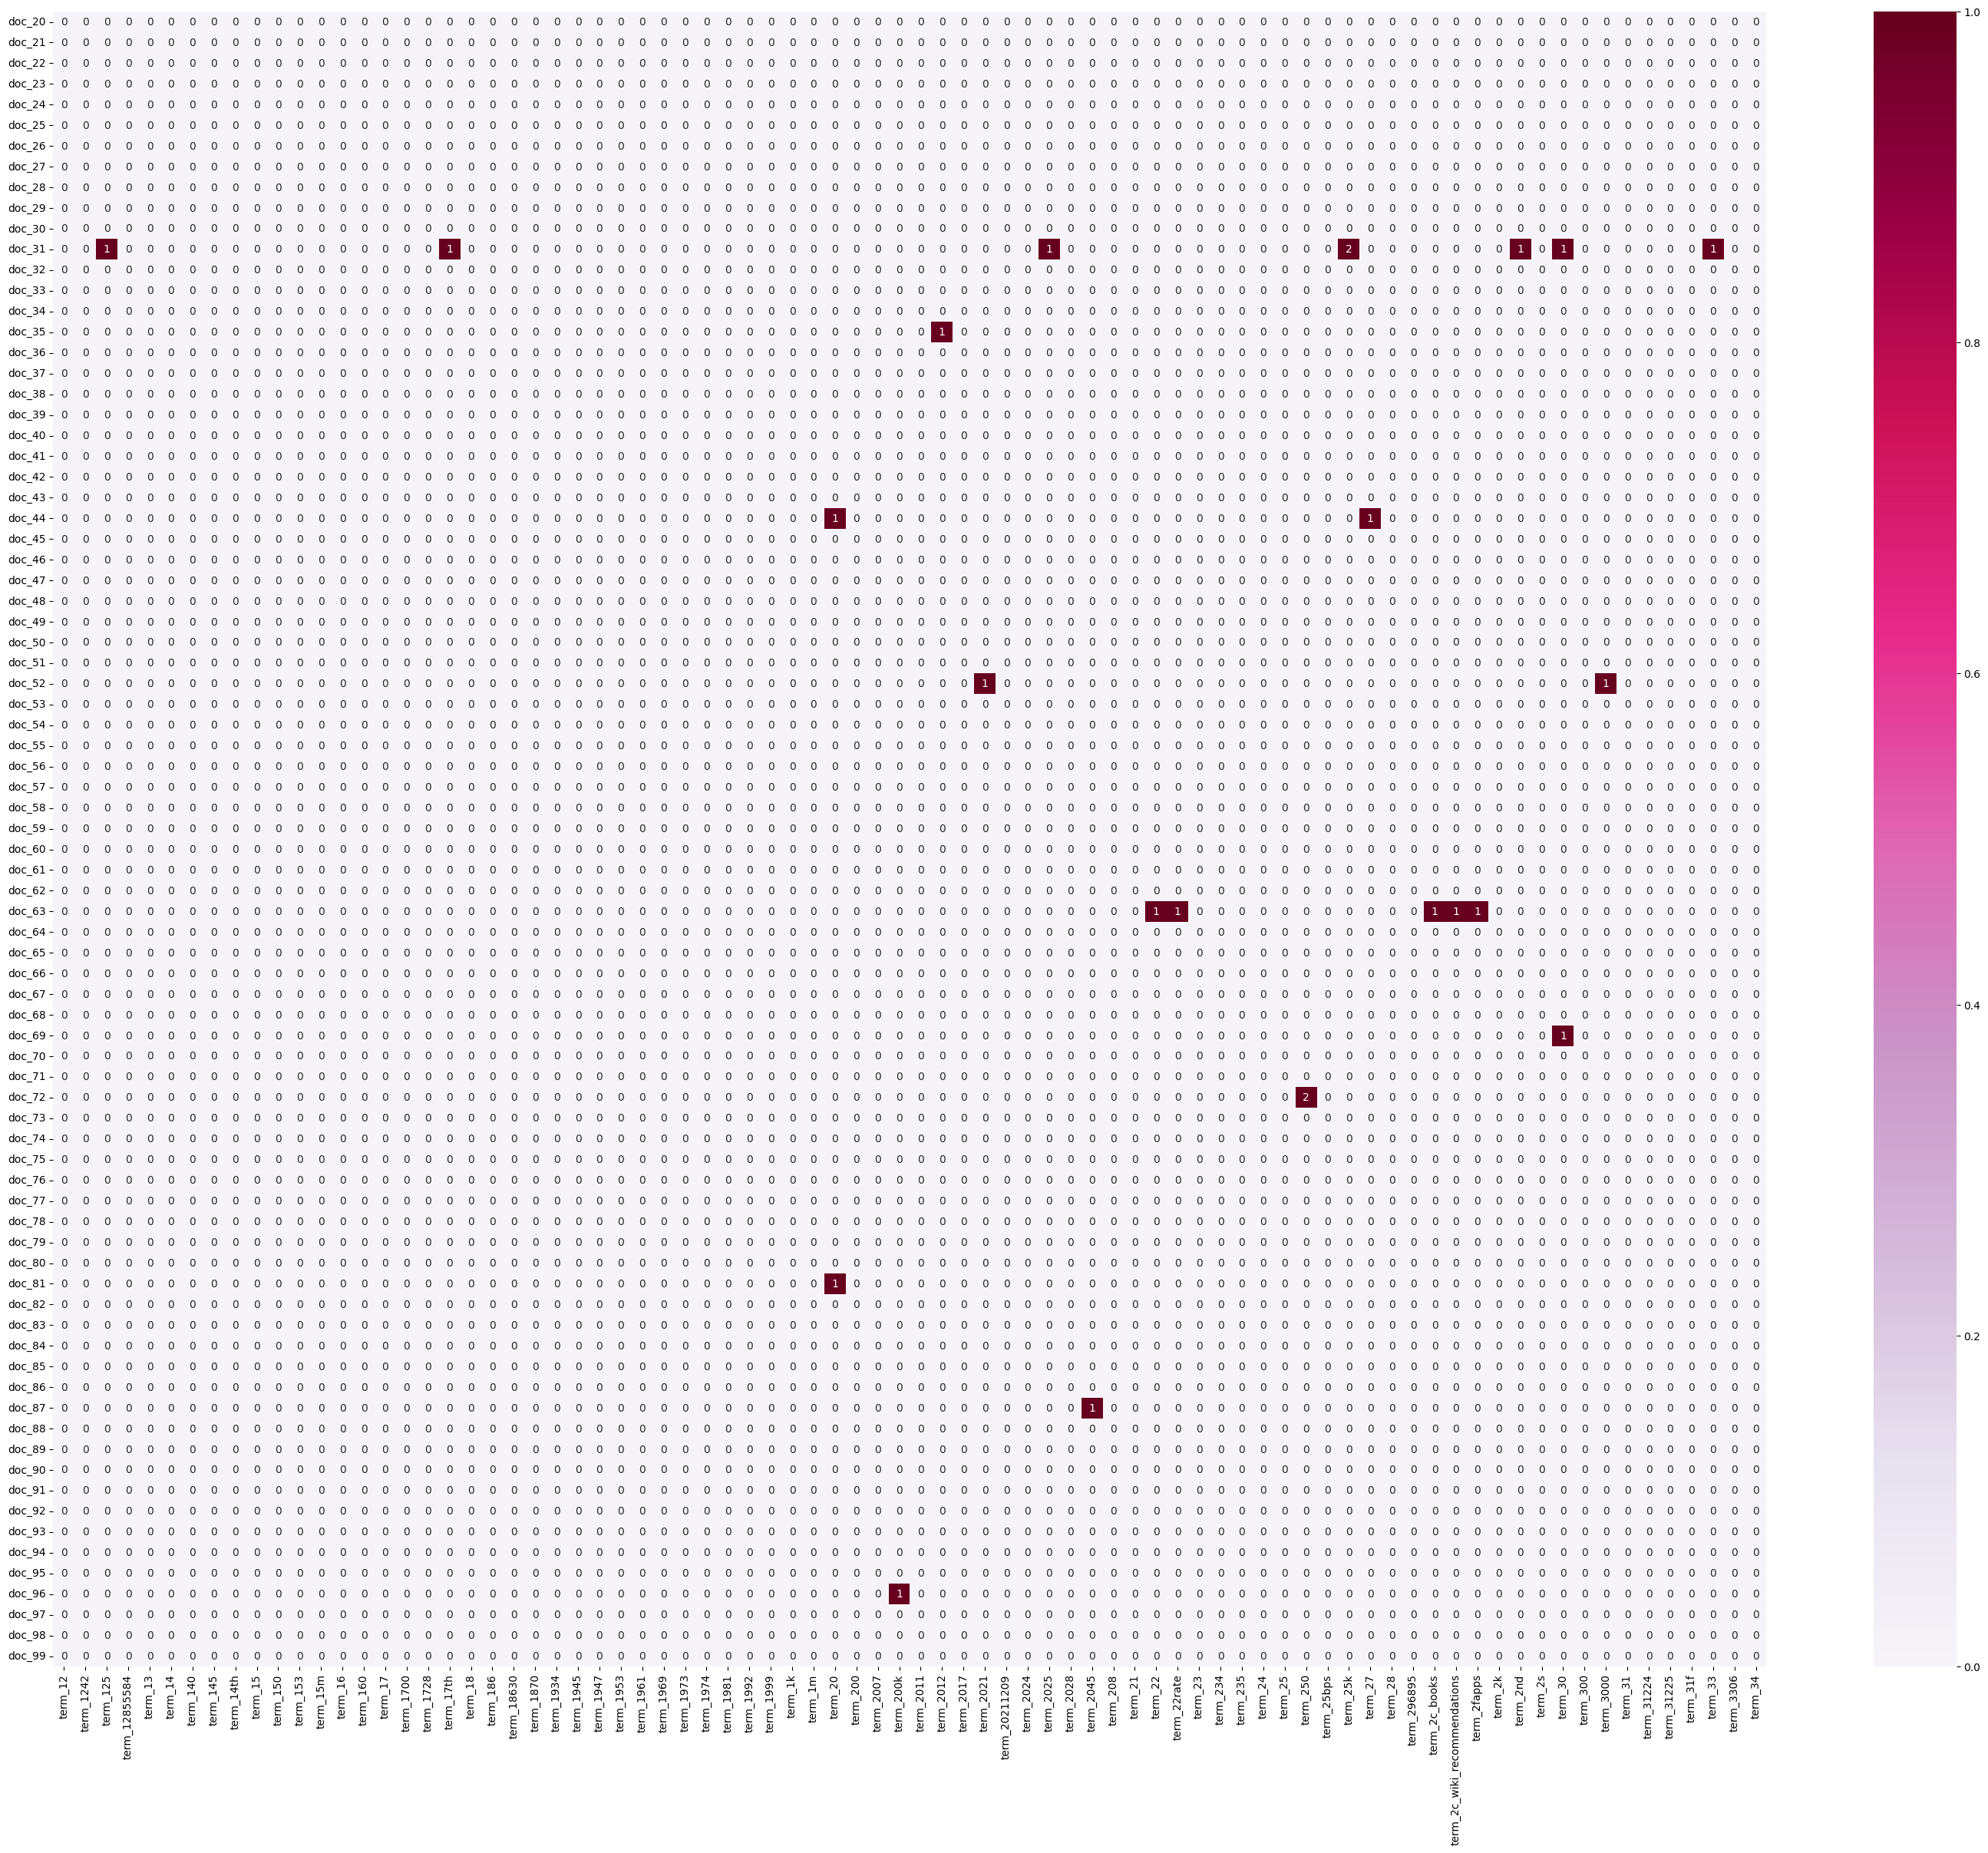

In [147]:
df_todraw = pd.DataFrame(plot_c, columns = plot_a, index = plot_b)
plt.subplots(figsize=(36, 28))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

This might be bigger but it is still sparse.

In [149]:
# Case 2: Making a Document-Term matrix to then visualize the 50 most used terms in the first 100 documents.

df_texts = df["unigrams"].astype(str)

vectorizer = CountVectorizer()
df_dtm = vectorizer.fit_transform(df_texts)

# Convert it to DataFrame
df_dtm = pd.DataFrame(df_dtm.toarray(), columns=vectorizer.get_feature_names_out())

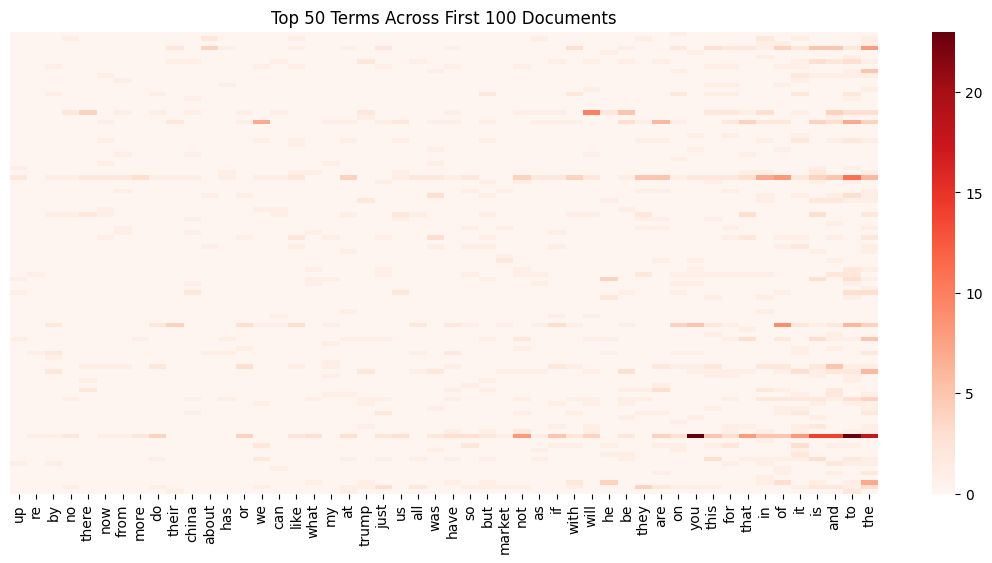

In [150]:
term_sums = df_dtm.sum(axis=0).to_numpy()
top_indices = np.argsort(term_sums)[-50:]
submatrix = df_dtm.iloc[:100, top_indices].to_numpy()

# Plot with labels
top_terms = df_dtm.columns[top_indices]

plt.figure(figsize=(14, 6))
sns.heatmap(submatrix, cmap="Reds", xticklabels=top_terms, yticklabels=False)
plt.xticks(rotation=90)
plt.title("Top 50 Terms Across First 100 Documents")
plt.show()

Now, we can see that the visualization is easier to interpret. By selecting the top 50 most used terms rather than just picking random terms, we can get better insights. This example is used for the first 100 doecuments and can be easily adjusted to any subset of the document.

### 5.4 Attribute Transformation / Aggregation

### 5.4.1 Transform Text Data

In [151]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [152]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [154]:
term_frequencies[0] #sum of first term

np.int64(4)

/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_34632/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


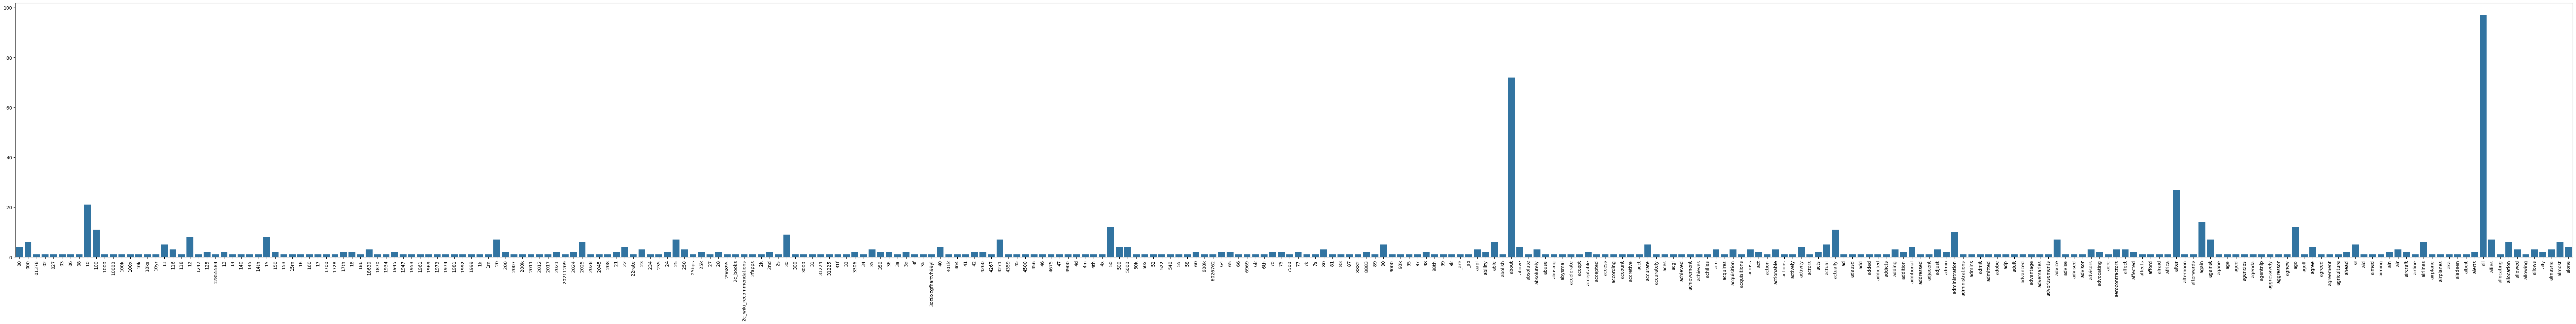

In [155]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12:**
Using Plotly for interactive visualization

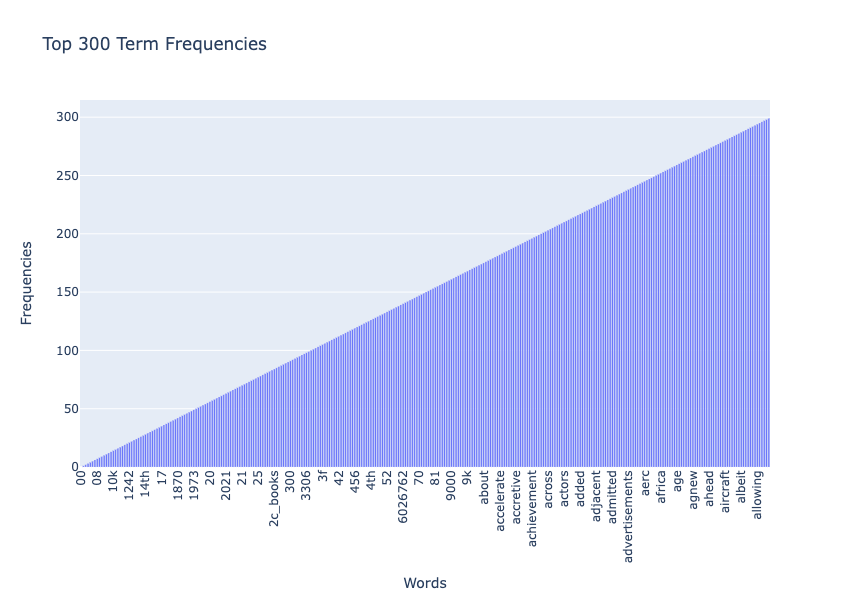

In [156]:
import plotly.express as px

words = count_vect.get_feature_names_out()[:300]
freqs = term_frequencies[:300]

fig = px.bar(
    x=words,
    y=freqs,
    labels={'x': 'Words', 'y': 'Frequencies'},
    title="Top 300 Term Frequencies"
)

fig.update_layout(
    xaxis_tickangle=-90,
    width=3000,  
    height=600
)

fig.show()

### >>> **Exercise 13:** 
Efficiently reduce the number of terms

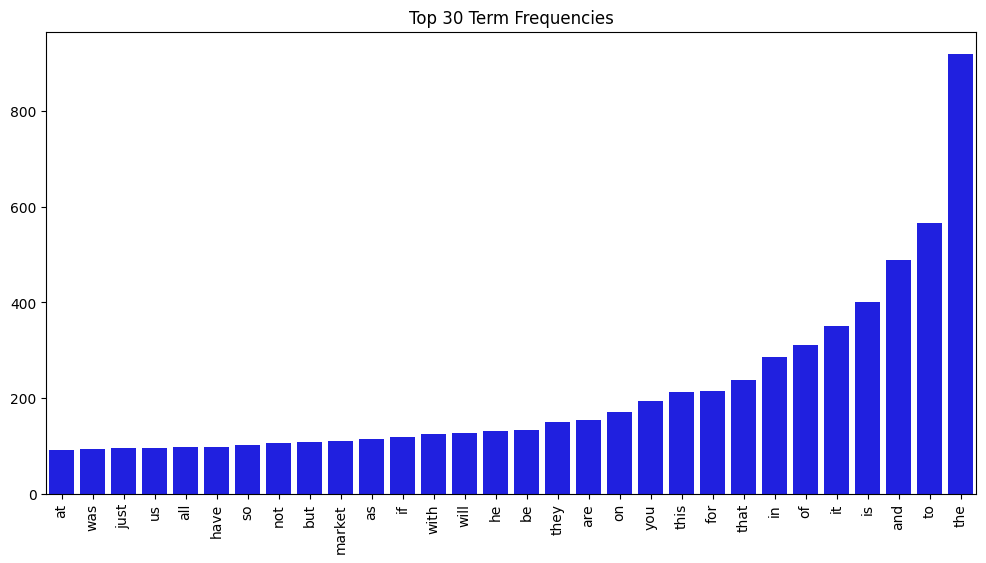

In [157]:
# Answer here

# Case 1: select top-n most frequent terms

top_n = 30
indices = np.argsort(term_frequencies)[-top_n:]  
words = count_vect.get_feature_names_out()[indices]
freqs = term_frequencies[indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=words, y=freqs, color="blue")
plt.xticks(rotation=90)
plt.title(f"Top {top_n} Term Frequencies")
plt.show()

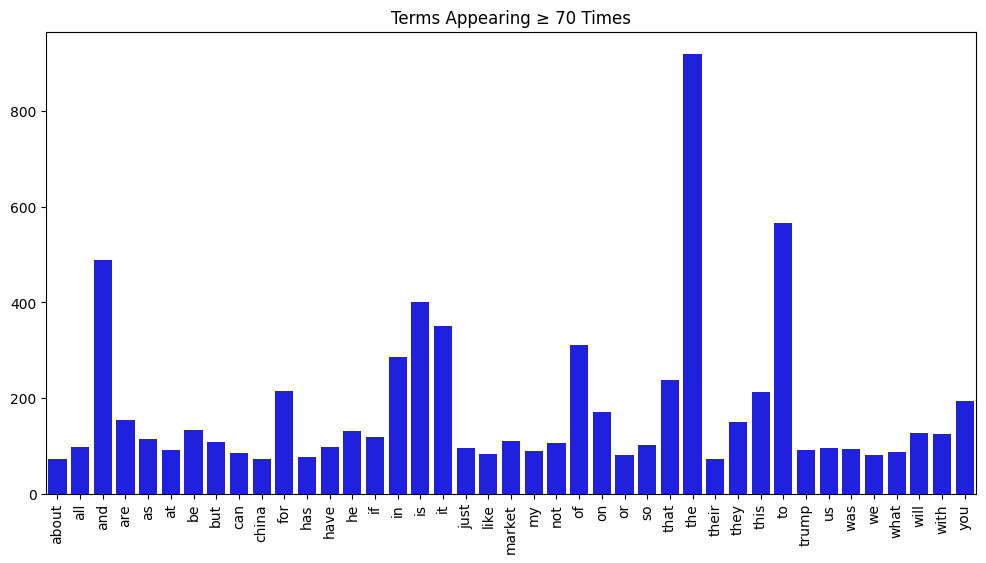

In [163]:
# Case 2: Set minimum n to show

min_freq = 70
mask = term_frequencies >= min_freq
words = count_vect.get_feature_names_out()[mask]
freqs = term_frequencies[mask]

plt.figure(figsize=(12, 6))
sns.barplot(x=words, y=freqs, color="blue")
plt.xticks(rotation=90)
plt.title(f"Terms Appearing ≥ {min_freq} Times")
plt.show()

### >>> **Exercise 14 :** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order.

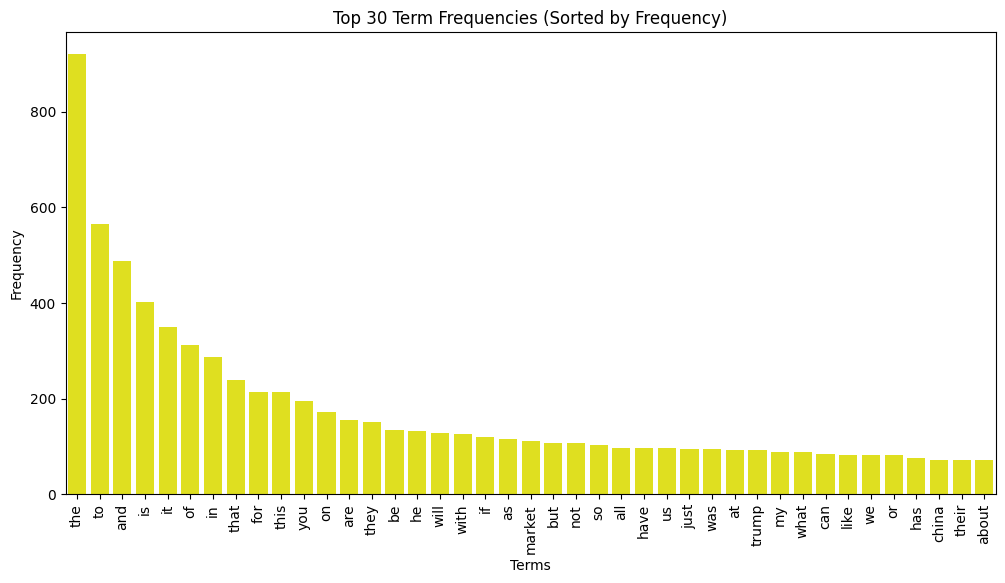

In [164]:
sorted_idx = np.argsort(freqs)[::-1]
words = words[sorted_idx]
freqs = freqs[sorted_idx]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=words, y=freqs, color="yellow")
plt.xticks(rotation=90)
plt.title(f"Top {top_n} Term Frequencies (Sorted by Frequency)")
plt.ylabel("Frequency")
plt.xlabel("Terms")
plt.show()

In [165]:
# Using log distribution
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_34632/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



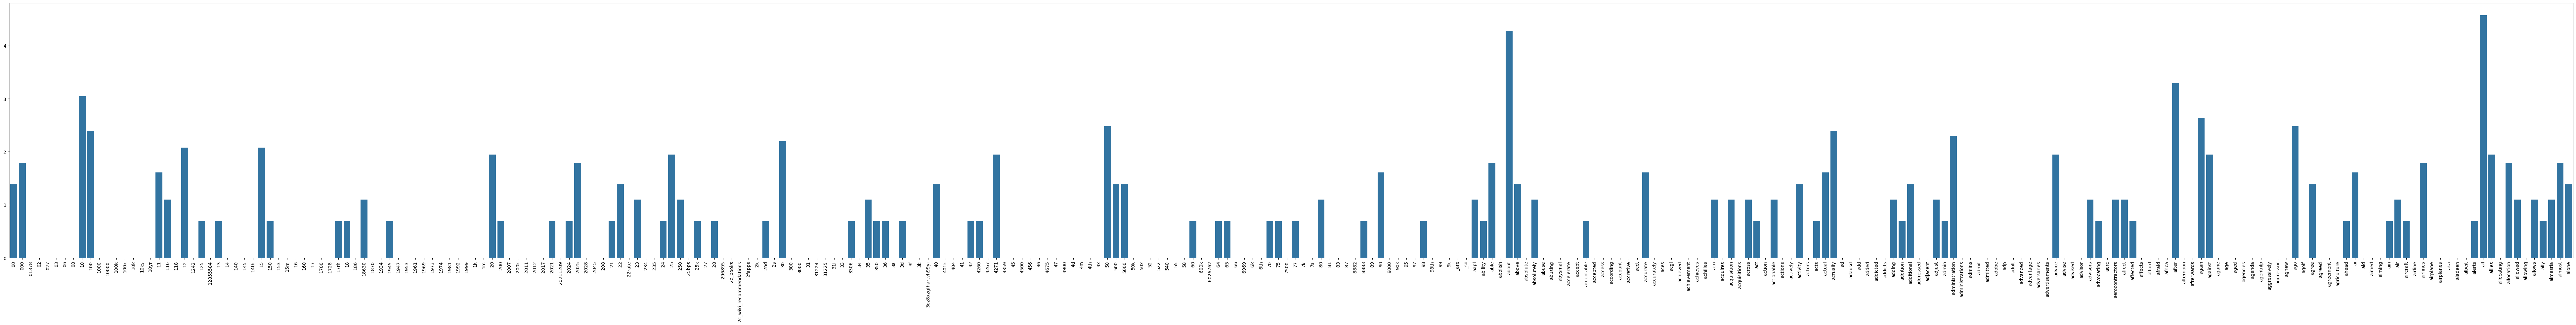

In [167]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 
Implementing the code to the log frequency

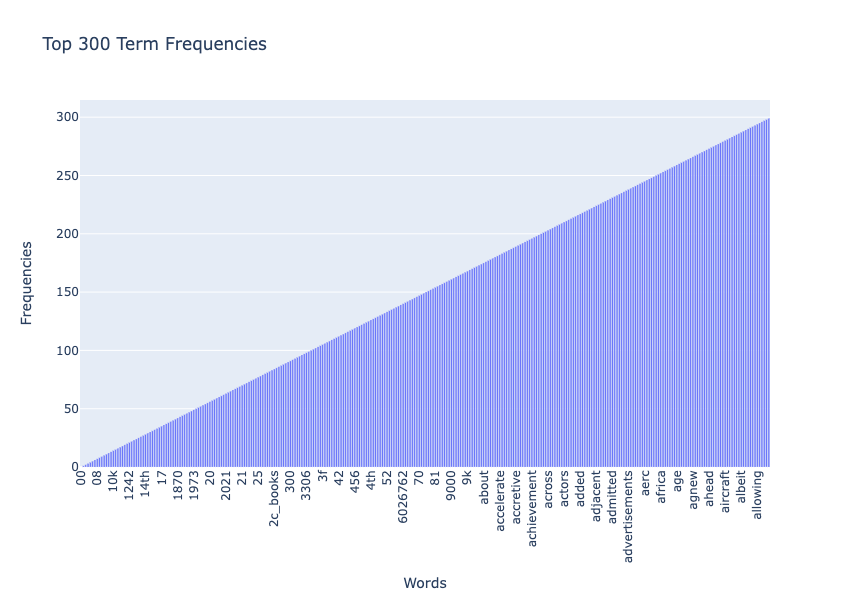

In [168]:
# Answer here

words = count_vect.get_feature_names_out()[:300]
freqs = term_frequencies_log[:300]
b
fig = px.bar(
    x=words,
    y=freqs,
    labels={'x': 'Words', 'y': 'Frequencies'},
    title="Top 300 Term Frequencies"
)

fig.update_layout(
    xaxis_tickangle=-90,
    width=3000,  
    height=600
)

fig.show()

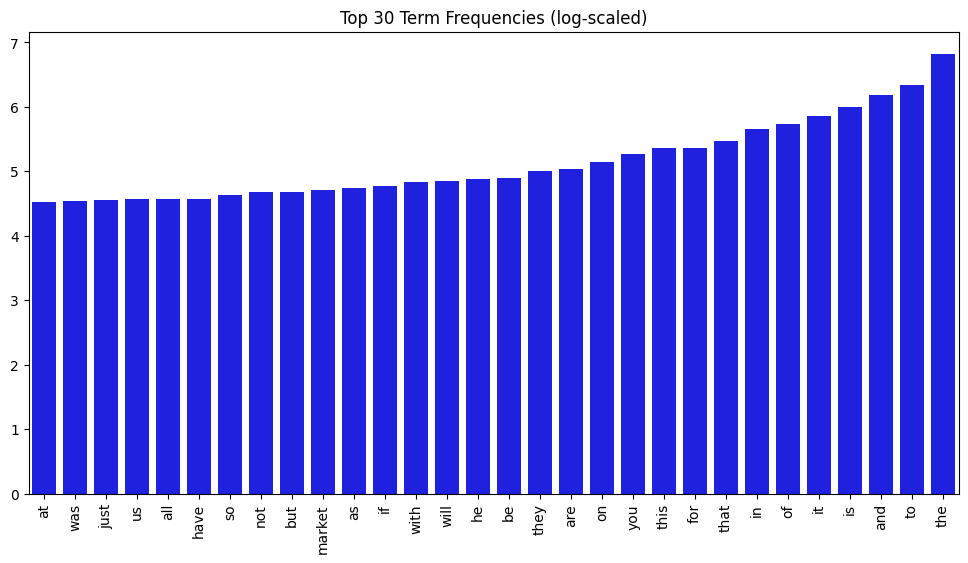

In [169]:
top_n = 30

term_frequencies_log = np.array(term_frequencies_log)

indices_log = np.argsort(term_frequencies_log)[-top_n:]
words_log = count_vect.get_feature_names_out()[indices]
freqs_log = term_frequencies_log[indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=words_log, y=freqs_log, color="blue")
plt.xticks(rotation=90)
plt.title(f"Top {top_n} Term Frequencies (log-scaled)")
plt.show()

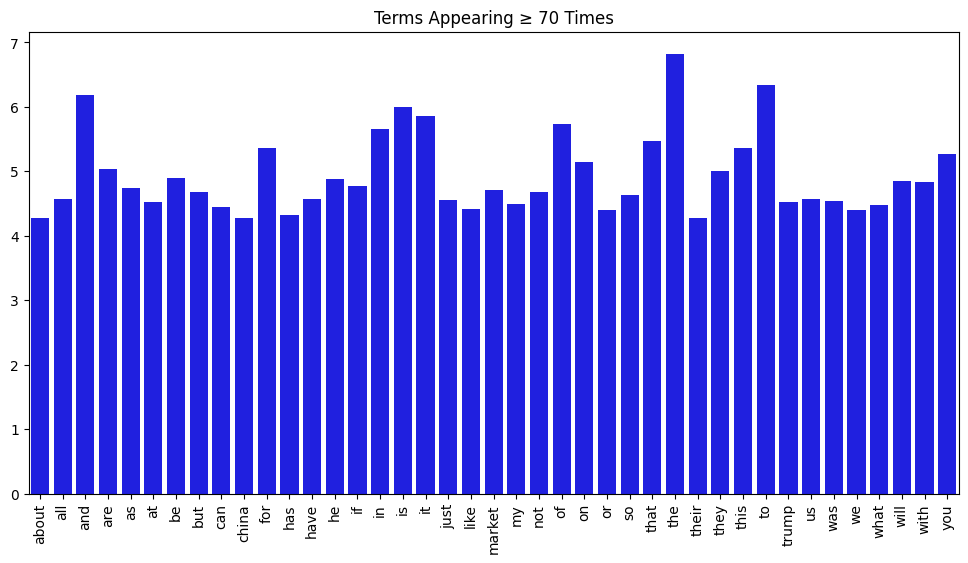

In [171]:
min_freq = 70
mask_log = term_frequencies >= min_freq
words_log = count_vect.get_feature_names_out()[mask_log]
freqs_log = term_frequencies_log[mask_log]

plt.figure(figsize=(12, 6))
sns.barplot(x=words_log, y=freqs_log, color="blue")
plt.xticks(rotation=90)
plt.title(f"Terms Appearing ≥ {min_freq} Times")
plt.show()


# Phase 2

In [ ]:
### Begin Assignment Here